In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def H(n,x):
    if n==-1: return 0
    elif n==0: return 1
    elif n==1: return 2*x
    #elif n==1: return 2*x
    else: return 2*x*H(n-1,x)-2*(n-1)*H(n-2,x)
    
def psi(n,x):
    return H(n,x)/np.sqrt((2**n*math.factorial(n)*np.sqrt(np.pi)))*np.exp(-x**2/2)

def k(n,x):
    return (2*epsilon(n)-x**2)

def epsilon(n):
    return (n+1/2)

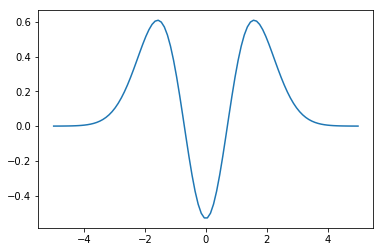

In [3]:
x = np.linspace(-5,5,100)
plt.plot(x,psi(2,x))

In [4]:
def numerov(n,h,start,end):
    a = 1
    steps=int(np.abs(start-end)/h+h)
    y = np.zeros(steps)
    x = np.zeros(steps)
    
    for i in range(steps):
        if i==0: x[0]=start
        else: x[i] = x[0]+i*h
            
    if (n % 2 == 0):
        y[0] = a
        y[1] = y[0] - h**2*k(n,x[0])*y[0]/2
        print("even")
    else: 
        y[0] = 0
        y[1] = -h
        print("odd")
        
    for i in range(1,steps-1): 
        y[i+1]=(2*(1-5/12*h**2*k(n,x[i]))*y[i]-(1+1/12*h**2*k(n,x[i-1]))*y[i-1])/(1+1/12*h**2*k(n,x[i+1]))
        
    return x,y

In [ ]:
h = 0.001
start = -6
end = 6
n = 0

x,y = numerov(n,h,start,end)
y_norm = y/max(y)*max(psi(n,x))

plt.plot(x,psi(n,x),label="analytic")
plt.plot(x,y_norm,label="numerical")
plt.legend()

In [143]:
def k(e,x):
    return (e-x)

def numerov2(e,h,start,end):
    a = 1e-6
    steps=int(np.abs(start-end)/h+h)
    y = np.zeros(steps)
    x = np.zeros(steps)
    
    for i in range(steps):
        if i==0: x[0]=start
        else: x[i] = x[0]+i*h
            
    y[0] = a
    y[1] = y[0] - h**2*k(e,x[0])*y[0]/2
    
    for i in range(1,steps-1):
        y[i+1]=(2*(1-5/12*h**2*k(e,x[i]))*y[i]-(1+1/12*h**2*k(e,x[i-1]))*y[i-1])/(1+1/12*h**2*k(e,x[i+1]))
        
    return x,y

No handles with labels found to put in legend.


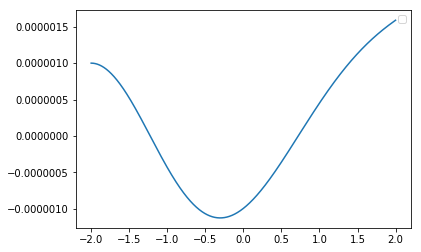

In [144]:
h = 0.001
start = -2
end = 2

e = 2.33815
#e = 4.087
#e = 8.000

x,y = numerov2( e, h, start, end)

plt.plot( x, y)
plt.legend()